### Table of Content
* MFI [Money Flow Index](#MFI)
* RSI [Relative Strength Index](#RSI)
* OBV [On-Balance Volume](#OBV)
* BBS [Bollinger Band Strategy](#BBS)

<h1> MFI, Money Flow Index</h1>
<a class="anchor" id="MFI">MFI</a> is a technical indicator that generates overbought or oversold signals using both prices and volume data.
0. Get instrument historical data <br>
1. Calculate the Typical Price for each of the last periods (normally 14 days). <br>
2. For each period, mark whether the typical price was higher or lower than the prior period. This will tell you whether Raw Money Flow is positive or negative <br>


In [5]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
stock = 'ANSS'
df = web.DataReader(stock, data_source='yahoo', start='01-01-2019')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,143.679993,137.139999,140.190002,143.009995,711000,143.009995
2019-01-03,142.380005,137.440002,141.160004,137.639999,725800,137.639999
2019-01-04,144.699997,138.460007,139.490005,143.660004,632400,143.660004
2019-01-07,148.589996,143.350006,144.000000,147.320007,486200,147.320007
2019-01-08,150.710007,146.580002,148.529999,148.050003,533600,148.050003
...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988


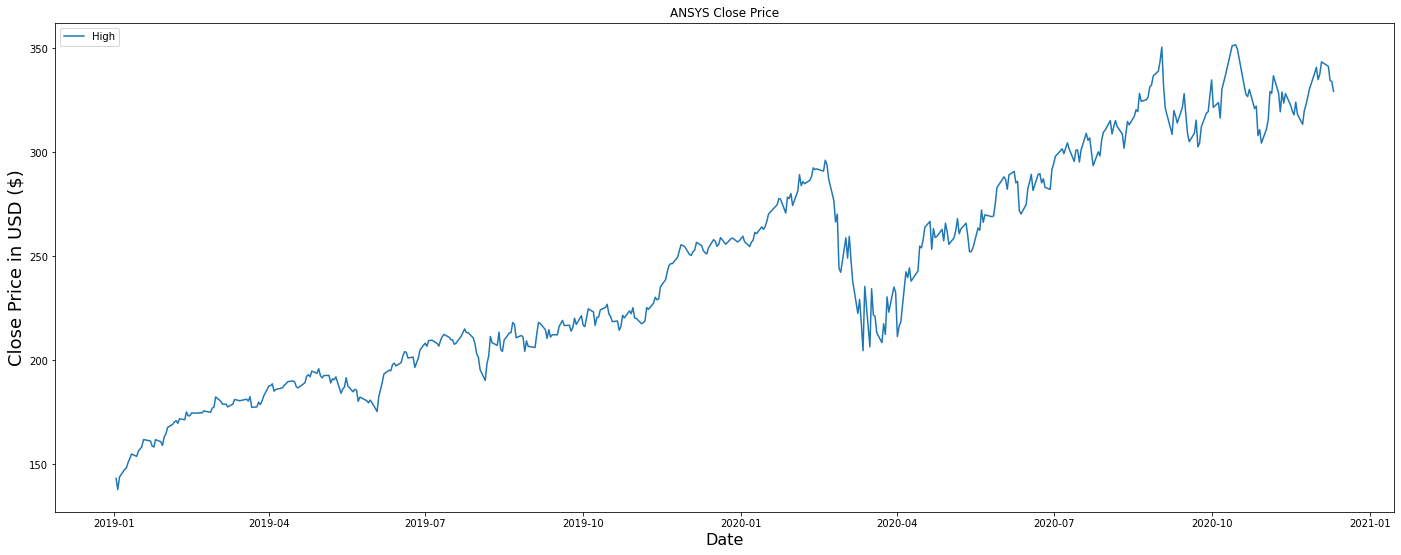

In [6]:
plt.figure(figsize=(24,9))
plt.plot(df['Close'], label = 'Closing Price')
plt.title('ANSYS Close Price')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Close Price in USD ($)', fontsize = 18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

$ typical \; price = \frac{High + Low + Close}{3} $

In [7]:
# calculate typical price
typical_price = (df['High'] + df['Low'] + df['Close'])/3
typical_price

Date
2019-01-02    141.276662
2019-01-03    139.153336
2019-01-04    142.273336
2019-01-07    146.420003
2019-01-08    148.446671
                 ...    
2020-12-07    343.016673
2020-12-08    341.346659
2020-12-09    337.099996
2020-12-10    333.836670
2020-12-11    330.816661
Length: 492, dtype: float64

$ Raw \; Money \; Flow = typical \; price * volume $

In [8]:
period = 14
money_flow = typical_price * df['Volume']
money_flow

Date
2019-01-02    1.004477e+08
2019-01-03    1.009975e+08
2019-01-04    8.997366e+07
2019-01-07    7.118941e+07
2019-01-08    7.921114e+07
                  ...     
2020-12-07    1.200901e+08
2020-12-08    1.374603e+08
2020-12-09    1.111082e+08
2020-12-10    1.067610e+08
2020-12-11    2.421843e+07
Length: 492, dtype: float64

In [9]:
# get Positive and Negative money flows
p_flow = []; n_flow=[]

for i in range(1, len(typical_price)):
    if   typical_price[i] > typical_price[i-1]:
        p_flow.append(money_flow[i-1])
        n_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        n_flow.append(money_flow[i-1])
        p_flow.append(0)
    else:
        n_flow.append(0)
        p_flow.append(0)



In [10]:
# accumulate positive and negative flows within the time period, current 14 days
p_mf=[];n_mf=[]

for i in range(period-1, len(p_flow)):
    p_mf.append( sum(p_flow[i+1-period : i+1]))
    n_mf.append( sum(n_flow[i+1-period : i+1]))

$Money \; Flow \; Index = \frac{100 * Positive \; Money \; Flow}{Positive \; Money \; Flow + Negative \; Money \; Flow} $

In [11]:
#calculate MFI
mfi = 100 * (np.array(p_mf) / (np.array(p_mf) + np.array(n_mf)))
mfi

array([66.97451641, 69.91564963, 68.98611835, 62.08375878, 56.75416553,
       54.64220678, 54.38606238, 55.70825911, 65.61972559, 65.50314715,
       59.94511923, 60.60644001, 60.60296256, 68.71131414, 77.74399259,
       76.26867199, 67.80882292, 74.29691873, 79.13111054, 79.60791087,
       74.48296806, 72.89871946, 64.64889982, 55.53961233, 60.96953025,
       62.03147032, 66.53253437, 57.42157776, 48.63785668, 47.33903221,
       53.70870599, 48.00923293, 50.27752093, 51.39888928, 56.37749561,
       50.97550615, 49.7132187 , 57.40534944, 57.59953938, 51.92004804,
       47.72256749, 48.09545375, 49.20722952, 56.65203477, 56.02327257,
       61.88950036, 60.72965281, 60.30733641, 59.51335079, 67.26766357,
       67.65431007, 65.28587604, 59.11016279, 64.78553713, 64.24424283,
       73.66800602, 82.67538118, 81.63668326, 75.89957691, 69.1333847 ,
       61.80865273, 61.53921305, 60.91280799, 61.39160066, 61.80313327,
       61.77341622, 70.47223047, 71.26332133, 62.6086132 , 50.43

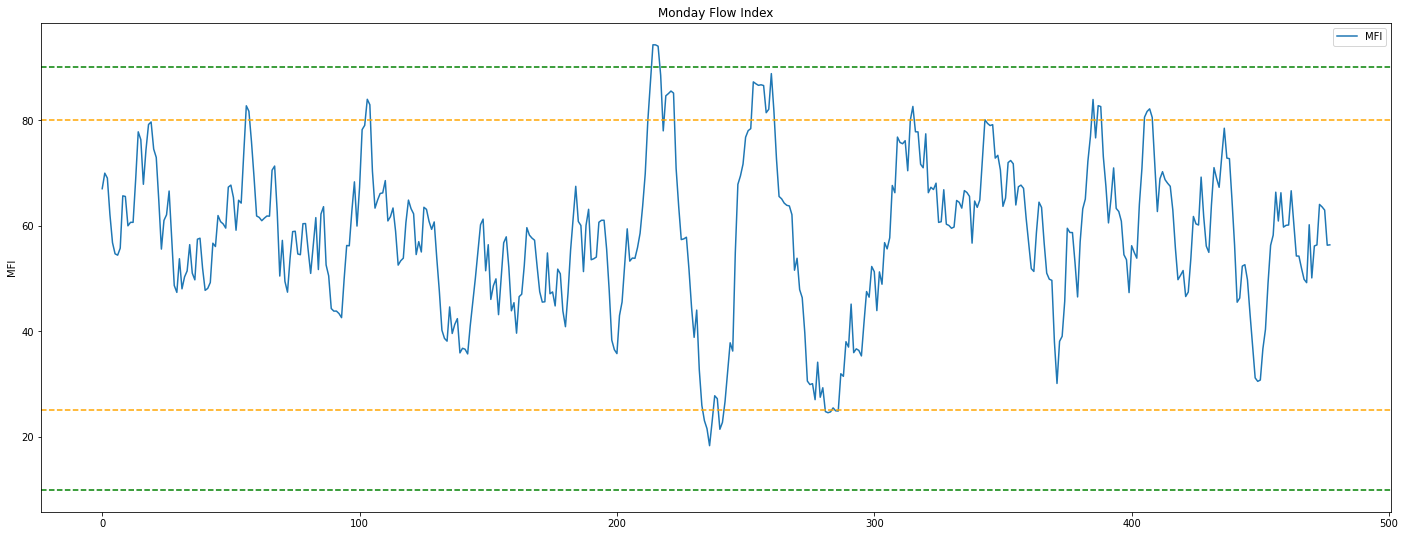

In [12]:
# matplotlib MFI
mfi_df = pd.DataFrame()
mfi_df['MFI'] = mfi
plt.figure(figsize=(24.2,9))
plt.plot(mfi_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(25, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()

In [13]:
# add mfi results to the 1st data frame
full_df  = pd.DataFrame()
full_df = df[period:]
full_df['MFI'] = mfi
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2019-01-23,162.910004,157.649994,161.570007,158.630005,349000,158.630005,66.974516
2019-01-24,159.240005,157.009995,158.589996,158.100006,445800,158.100006,69.915650
2019-01-25,162.000000,159.869995,160.250000,161.649994,340200,161.649994,68.986118
2019-01-28,161.259995,158.869995,160.250000,160.699997,219500,160.699997,62.083759
2019-01-29,160.820007,158.270004,159.960007,158.860001,229400,158.860001,56.754166
...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547


In [14]:
# a simple function to find overbought and oversold points
def get_mfi_points(FullDataFrame, high, low):
    buy_signal = []; sell_signal = []

    for i in range(len(FullDataFrame['MFI'])):
        if FullDataFrame['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
        elif FullDataFrame['MFI'][i] < low:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)


In [15]:
# add over overbought point and oversold points to dataframe
full_df['MFI_Buy']= get_mfi_points(full_df, 80, 25)[0]
full_df['MFI_Sell']= get_mfi_points(full_df, 80, 25)[1]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell
Date,,,,,,,,,
2019-01-23,162.910004,157.649994,161.570007,158.630005,349000,158.630005,66.974516,NaN,NaN
2019-01-24,159.240005,157.009995,158.589996,158.100006,445800,158.100006,69.915650,NaN,NaN
2019-01-25,162.000000,159.869995,160.250000,161.649994,340200,161.649994,68.986118,NaN,NaN
2019-01-28,161.259995,158.869995,160.250000,160.699997,219500,160.699997,62.083759,NaN,NaN
2019-01-29,160.820007,158.270004,159.960007,158.860001,229400,158.860001,56.754166,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570,NaN,NaN
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976,NaN,NaN
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547,NaN,NaN


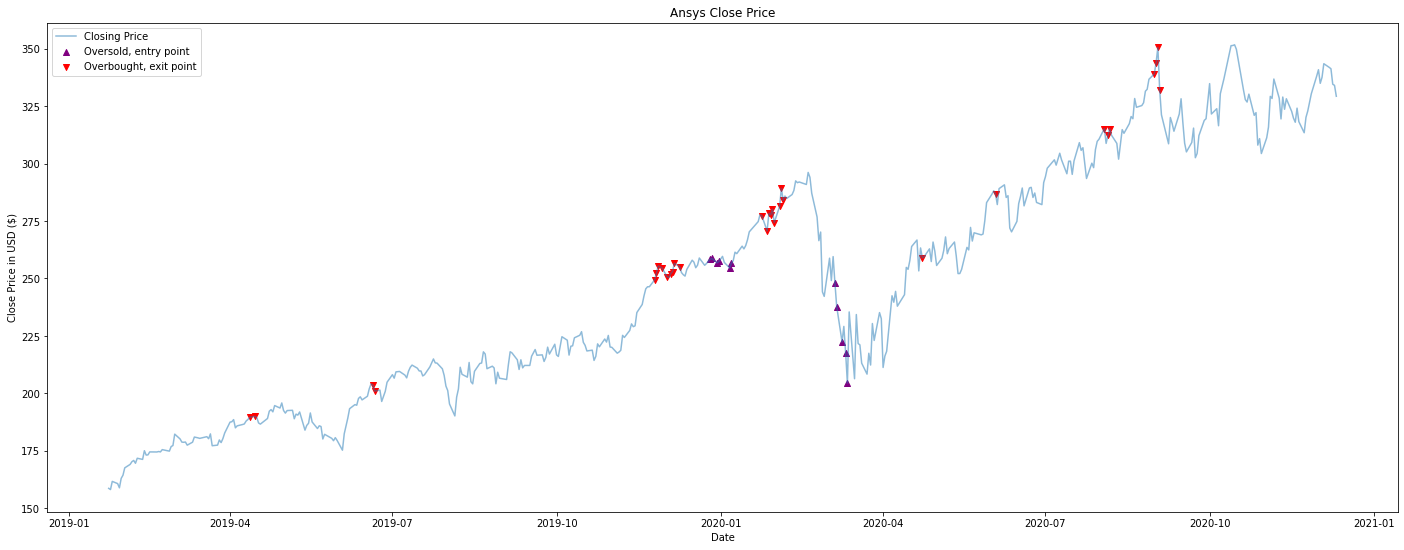

In [16]:
#draw a pretty picture to show the overbougth oversold points on the ohlc plot
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'Overbought, exit point', marker = 'v', alpha = 1)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

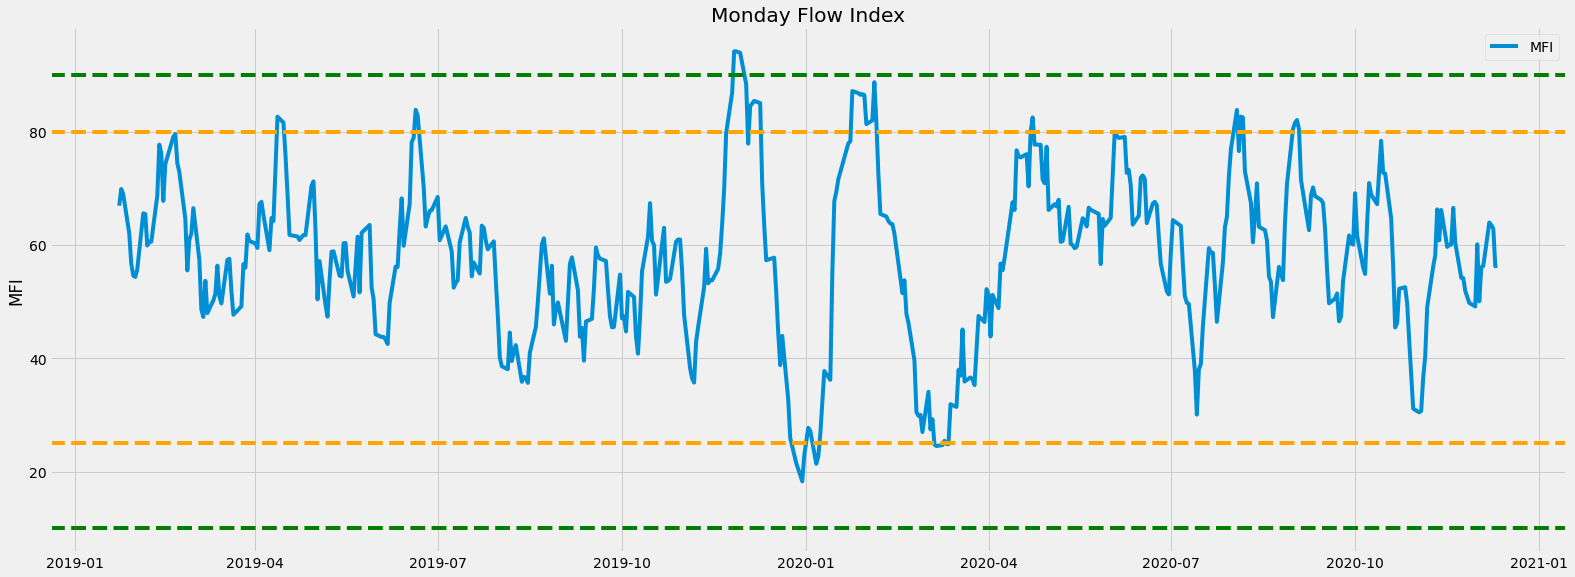

In [17]:
# Add some style to the plot so it's comparable from above plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(full_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(25, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()
# Reference from https://www.youtube.com/watch?v=tF1Lz4WBQwM

<h1 id="RSI"> RSI, Relative Strength Index</h1>
RSI is another momentum indicator that measures the magnitude of recent price chane to evaluate price of a stock's overbought or oversold status. Unlike MFI, it doesn't take volume into consideration. 

$RSI = 100 - [\frac{100}{1+RS} ] $ where $ RS = \frac{14 \; days \; average \; gain}{14 \; days \; average \; loss} $

In [18]:
# reference from https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas
# Quicker way
delta = df['Close'].diff() #calculate the difference of daily closing price
delta

Date
2019-01-02         NaN
2019-01-03   -5.369995
2019-01-04    6.020004
2019-01-07    3.660004
2019-01-08    0.729996
                ...   
2020-12-07   -1.579987
2020-12-08   -0.610016
2020-12-09   -6.730011
2020-12-10   -0.509979
2020-12-11   -4.740021
Name: Close, Length: 492, dtype: float64

$ RS = \frac{14 \; days \; average \; gain}{14 \; days \; average \; loss} $

In [19]:
dUp, dDown = delta.copy(), delta.copy()
dUp[dUp < 0] = 0
dDown[dDown > 0] = 0
RolUp = dUp.rolling(period).mean() # previous 14 days average gain
RolDown = dDown.rolling(period).mean().abs() # !! different from what's described in https://www.investopedia.com/terms/r/rsi.asp

RS = RolUp / RolDown
RS

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2020-12-07    1.840035
2020-12-08    2.042696
2020-12-09    1.648394
2020-12-10    1.380807
2020-12-11    1.442839
Name: Close, Length: 492, dtype: float64

$RSI = 100 - [\frac{100}{1+RS} ] $

In [20]:
rsi= 100.0 - (100.0 / (1.0 + RS))
rsi

Date
2019-01-02          NaN
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
2019-01-08          NaN
                ...    
2020-12-07    64.789164
2020-12-08    67.134415
2020-12-09    62.241273
2020-12-10    57.997432
2020-12-11    59.064018
Name: Close, Length: 492, dtype: float64

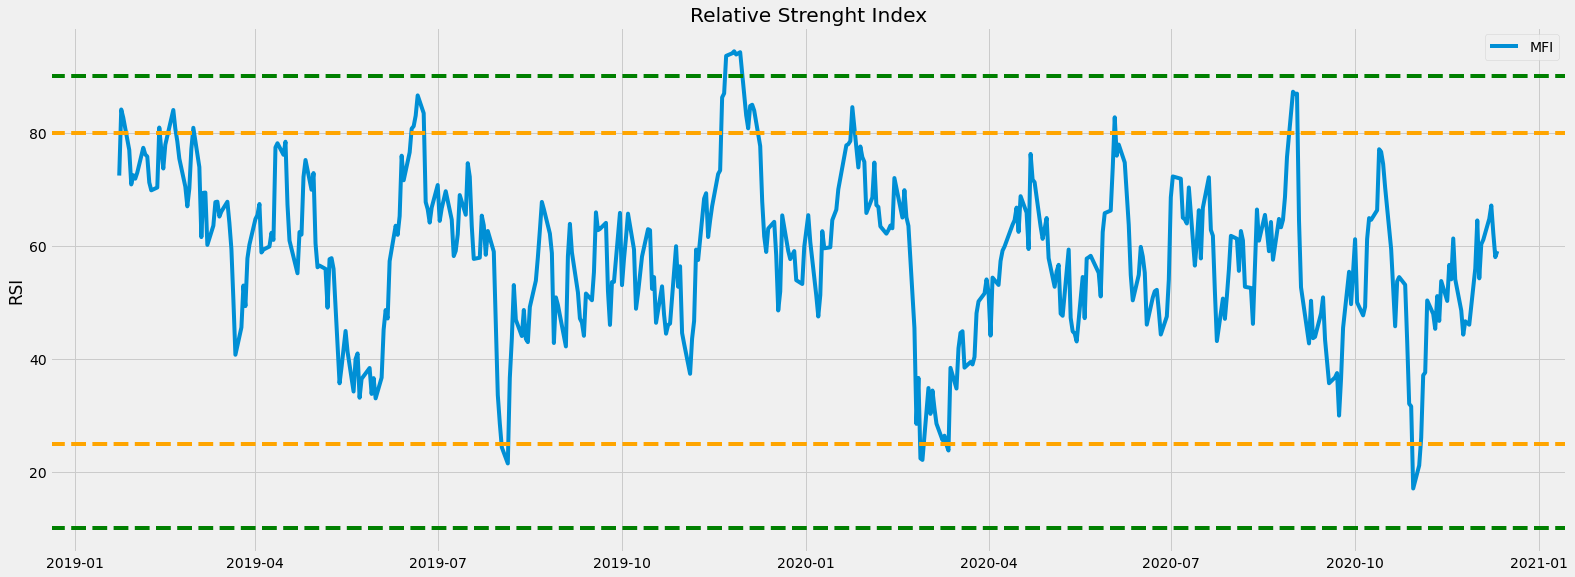

In [21]:
# matplotlib MFI
plt.figure(figsize=(24.2,9))
plt.plot(rsi, label = 'Relative Strenght Index')
plt.title('Relative Strenght Index')
# plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(25, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()

In [22]:
# add rsi results to the mfi data frame
full_df['RSI'] = rsi[period:]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell,RSI
Date,,,,,,,,,,
2019-01-23,162.910004,157.649994,161.570007,158.630005,349000,158.630005,66.974516,NaN,NaN,72.429658
2019-01-24,159.240005,157.009995,158.589996,158.100006,445800,158.100006,69.915650,NaN,NaN,84.122765
2019-01-25,162.000000,159.869995,160.250000,161.649994,340200,161.649994,68.986118,NaN,NaN,82.697208
2019-01-28,161.259995,158.869995,160.250000,160.699997,219500,160.699997,62.083759,NaN,NaN,76.975815
2019-01-29,160.820007,158.270004,159.960007,158.860001,229400,158.860001,56.754166,NaN,NaN,70.860688
...,...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570,NaN,NaN,64.789164
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976,NaN,NaN,67.134415
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547,NaN,NaN,62.241273


In [23]:
# a similar function to find bullish and bearing momentum points
def get_rsi_points(FullDataFrame, high, low):
    buy_signal = []; sell_signal = []

    for i in range(len(FullDataFrame['RSI'])):
        if FullDataFrame['RSI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
        elif FullDataFrame['RSI'][i] < low:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

In [24]:
# add over overbought point and oversold points to dataframe
full_df['RSI_Buy']= get_rsi_points(full_df, 70, 30)[0]
full_df['RSI_Sell']= get_rsi_points(full_df, 70, 30)[1]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell,RSI,RSI_Buy,RSI_Sell
Date,,,,,,,,,,,,
2019-01-23,162.910004,157.649994,161.570007,158.630005,349000,158.630005,66.974516,NaN,NaN,72.429658,NaN,158.630005
2019-01-24,159.240005,157.009995,158.589996,158.100006,445800,158.100006,69.915650,NaN,NaN,84.122765,NaN,158.100006
2019-01-25,162.000000,159.869995,160.250000,161.649994,340200,161.649994,68.986118,NaN,NaN,82.697208,NaN,161.649994
2019-01-28,161.259995,158.869995,160.250000,160.699997,219500,160.699997,62.083759,NaN,NaN,76.975815,NaN,160.699997
2019-01-29,160.820007,158.270004,159.960007,158.860001,229400,158.860001,56.754166,NaN,NaN,70.860688,NaN,158.860001
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,63.995570,NaN,NaN,64.789164,NaN,NaN
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,63.530976,NaN,NaN,67.134415,NaN,NaN
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,62.919547,NaN,NaN,62.241273,NaN,NaN


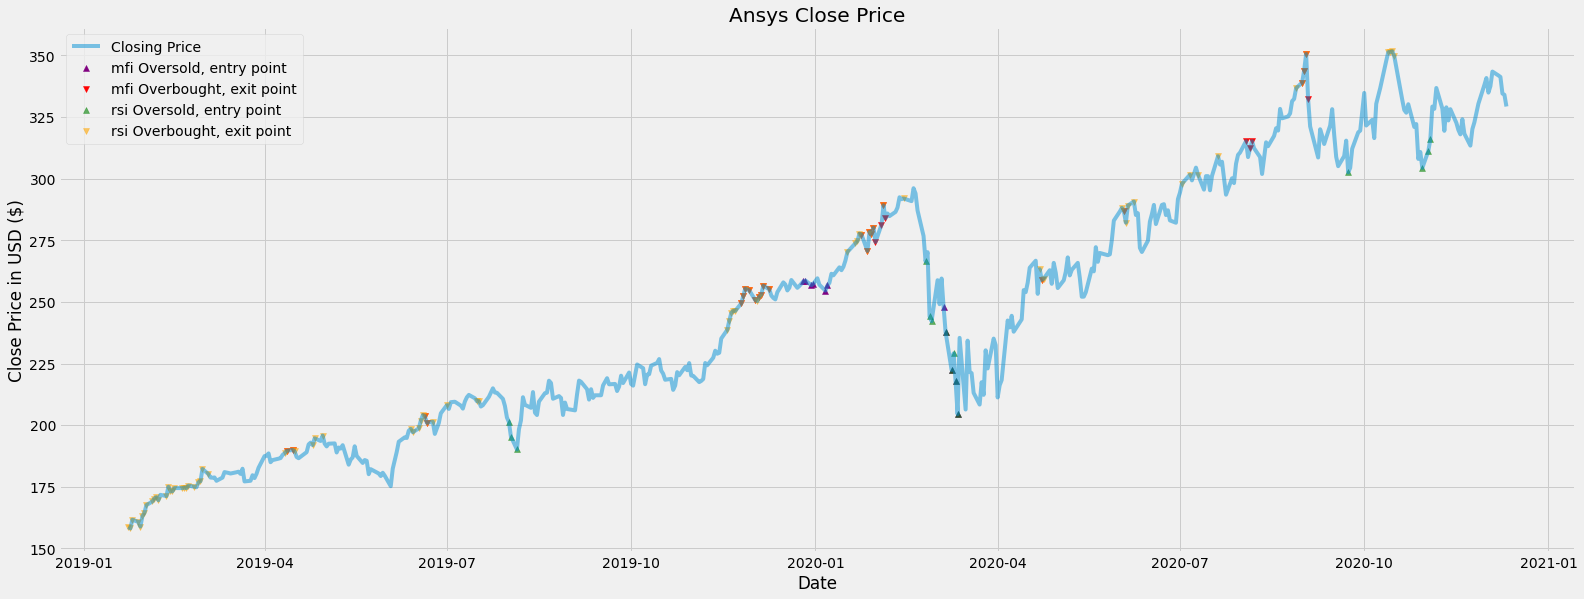

In [25]:
#draw a pretty picture to show the RSI overbougth oversold points on the ohlc plot
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', label = 'rsi Oversold, entry point', marker = '^', alpha = 0.6)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.6)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

#On-Balance Volume
[OBV](https://www.investopedia.com/terms/o/onbalancevolume.asp) is a technical trading momentum indicator that uses volume flow to predict changes in stock price. 

$$OBV= OBV_{prev}\begin{equation}
+\left\{ 
  \begin{aligned}
    -volume,  & \text{if } close < close_{prev}\\
    0, & \text{if } close = close_{prev}\\
    volume, & \text{if } close> close_{prev}\\
  \end{aligned}
  \right.
\end{equation}
$$
where <br>
$ OBV = \text{Current on-balance volume level} $

$ OBV_{prev} = \text{Previous on-balance volume level} $

volume = Latest trading volume amount


In [26]:
# calculate cumulative volumes OBV, obv_direction sets the if clause in the above equation,
obv_direction = df['Close'].diff() #calculate the difference of daily closing price
obv_direction[obv_direction > 0] = 1
obv_direction[obv_direction < 0] = -1

# calculate OBV
OBV = [0]
for i in range(1, len(df.Close)):
    OBV.append(OBV[-1] + obv_direction[i] * df.Volume[i])


In [27]:
OBV_df  = df.copy()
# add OBV to dataframe
OBV_df['OBV'] = OBV
# calculate OBV EMA
OBV_df['OBV_EMA'] = OBV_df['OBV'].ewm(span=20).mean()
OBV_df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2019-01-02,143.679993,137.139999,140.190002,143.009995,711000,143.009995,0.0,0.000000e+00
2019-01-03,142.380005,137.440002,141.160004,137.639999,725800,137.639999,-725800.0,-3.810450e+05
2019-01-04,144.699997,138.460007,139.490005,143.660004,632400,143.660004,-93400.0,-2.754235e+05
2019-01-07,148.589996,143.350006,144.000000,147.320007,486200,147.320007,392800.0,-8.251769e+04
2019-01-08,150.710007,146.580002,148.529999,148.050003,533600,148.050003,926400.0,1.615309e+05
...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,15960900.0,1.541715e+07
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,15558200.0,1.543058e+07
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,15228600.0,1.541135e+07


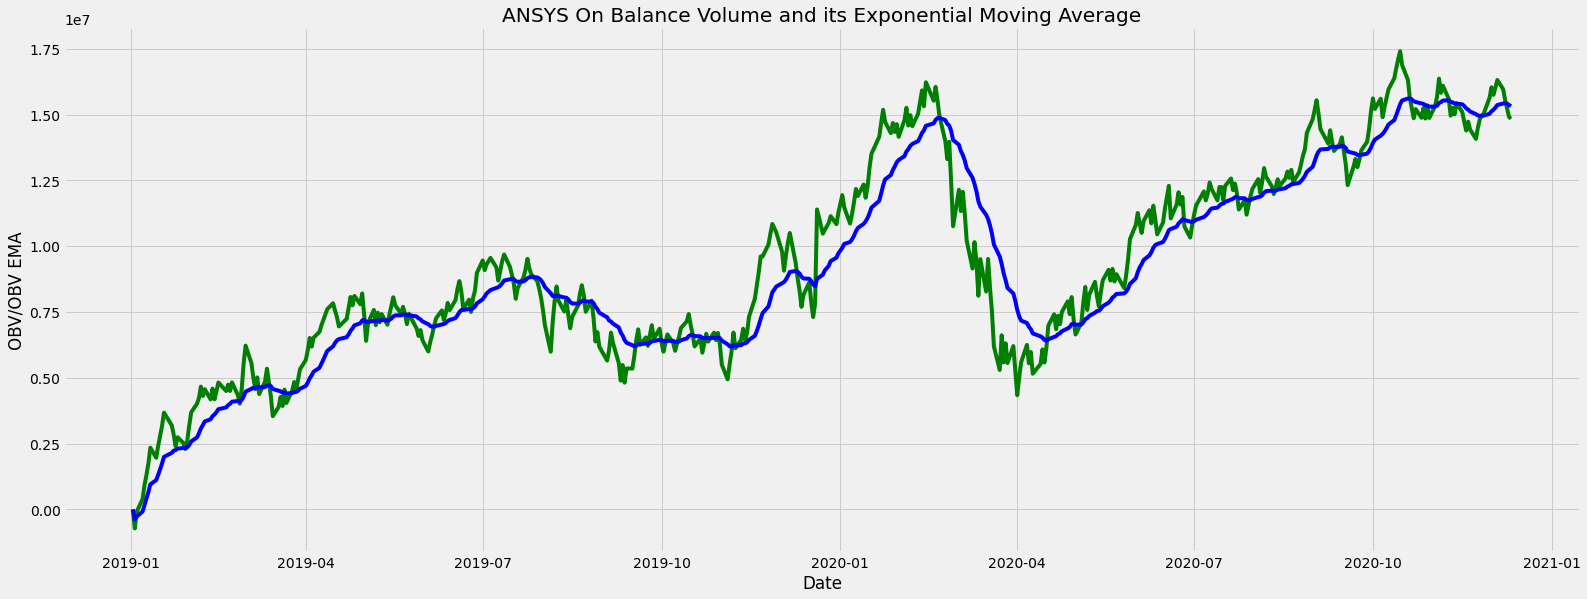

In [28]:
# plot OBV, OBV EMA
plt.figure(figsize=(24.2,9))
plt.plot(OBV_df['OBV'], label = 'OBV', color = 'green')
plt.plot(OBV_df['OBV_EMA'], label = 'OBV EMA', color = 'blue')
plt.title('ANSYS On Balance Volume and its Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('OBV/OBV EMA')
# plt.legend(df.columns.label, loc='upper left')
plt.show()

In [29]:
#cross over points in above chart are defined as entry exit points, OBV > OBV_EMA buy, else sell
def get_obv_points(FullDataFrame):
    buy_signal = []; sell_signal = []
    flag = -1

    for i in range(len(FullDataFrame)):
        if FullDataFrame['OBV'][i] < FullDataFrame['OBV_EMA'][i] and flag == 1:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
            flag = -1
        elif FullDataFrame['OBV'][i] > FullDataFrame['OBV_EMA'][i] and flag == -1:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
            flag = 1
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

In [30]:
x= get_obv_points(OBV_df)
OBV_df['OBV_Buy'] = x[0]
OBV_df['OBV_Sell'] = x[1]
OBV_df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,OBV_Buy,OBV_Sell
Date,,,,,,,,,,
2019-01-02,143.679993,137.139999,140.190002,143.009995,711000,143.009995,0.0,0.000000e+00,NaN,NaN
2019-01-03,142.380005,137.440002,141.160004,137.639999,725800,137.639999,-725800.0,-3.810450e+05,NaN,NaN
2019-01-04,144.699997,138.460007,139.490005,143.660004,632400,143.660004,-93400.0,-2.754235e+05,143.660004,NaN
2019-01-07,148.589996,143.350006,144.000000,147.320007,486200,147.320007,392800.0,-8.251769e+04,NaN,NaN
2019-01-08,150.710007,146.580002,148.529999,148.050003,533600,148.050003,926400.0,1.615309e+05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-07,346.679993,340.480011,343.920013,341.890015,350100,341.890015,15960900.0,1.541715e+07,NaN,NaN
2020-12-08,344.489990,338.269989,344.489990,341.279999,402700,341.279999,15558200.0,1.543058e+07,NaN,NaN
2020-12-09,343.480011,333.269989,342.700012,334.549988,329600,334.549988,15228600.0,1.541135e+07,NaN,334.549988


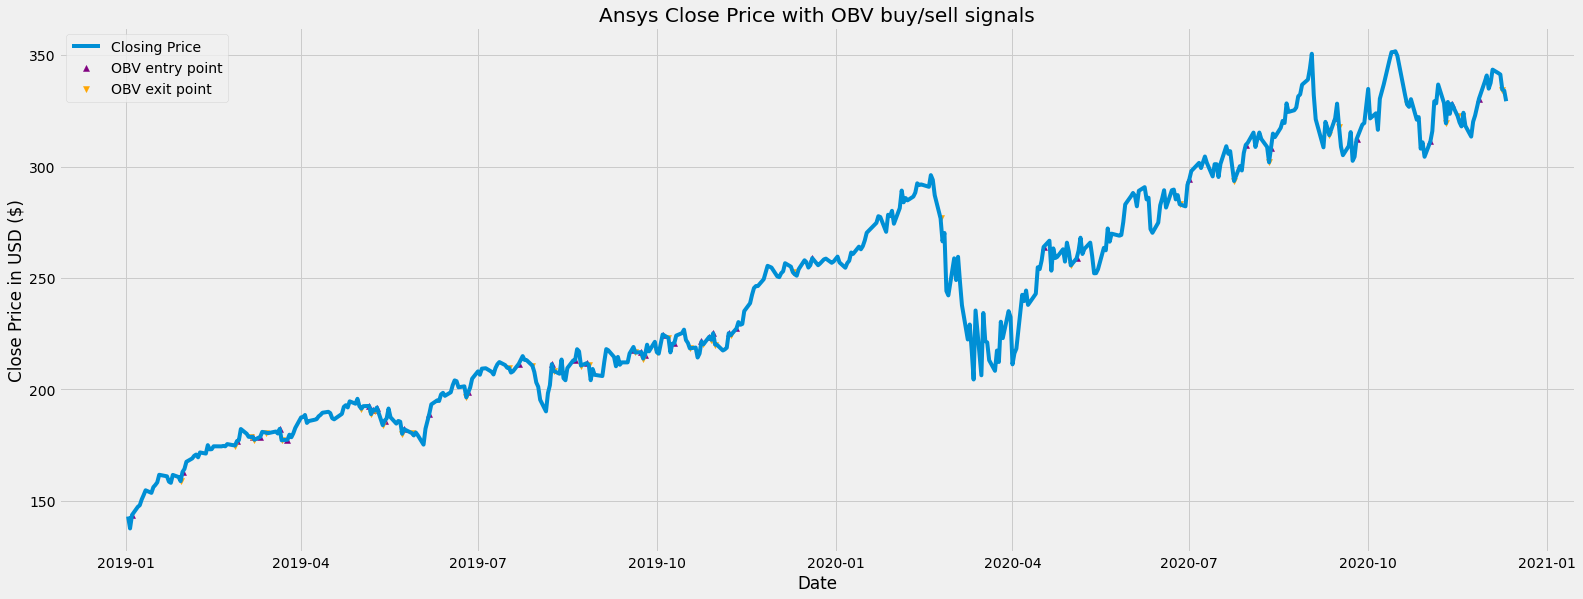

In [31]:
# Add OBV buy and sell points to OHLC chart
plt.figure(figsize=(24.2,9))
plt.plot(OBV_df['Close'], label = 'Closing Price')
plt.scatter(OBV_df.index, OBV_df['OBV_Buy'], color = 'purple', label = 'OBV entry point', marker = '^')
plt.scatter(OBV_df.index, OBV_df['OBV_Sell'], color = 'orange', label = 'OBV exit point', marker = 'v')
plt.title('Ansys Close Price with OBV buy/sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

In [32]:
full_df['OBV_Buy'] = x[0][period:]
full_df['OBV_Sell'] = x[1][period:]

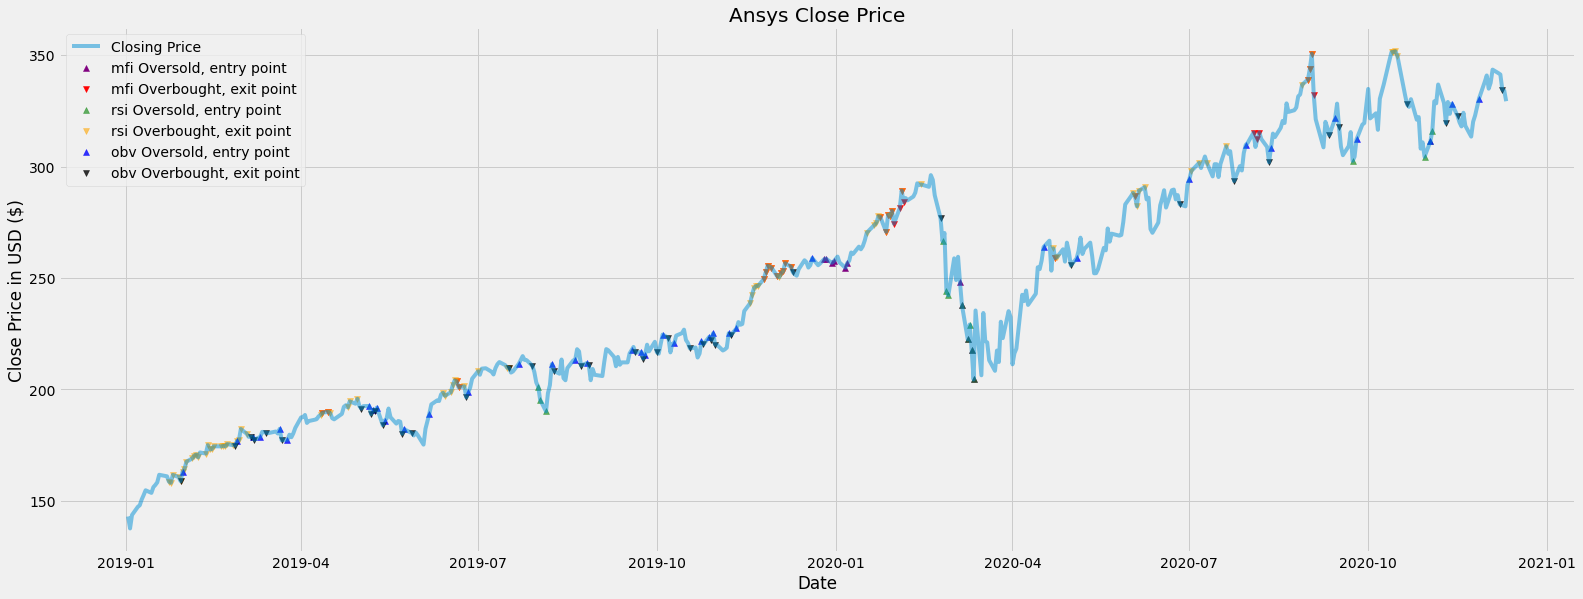

In [33]:
#add OBV to RSI, MFI chart
plt.figure(figsize=(24.2,9))
plt.plot(OBV_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', label = 'rsi Oversold, entry point', marker = '^', alpha = 0.6)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.6)
plt.scatter(full_df.index, full_df['OBV_Buy'], color = 'blue', label = 'obv Oversold, entry point', marker = '^', alpha = 0.8)
plt.scatter(full_df.index, full_df['OBV_Sell'], color = 'black', label = 'obv Overbought, exit point', marker = 'v', alpha = 0.8)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

<h1>Bollinger Band Strategy</h1>
<a class="anchor" id="BBS">BBS</a> is another technical analysis tool to find entry and exit price trending SMA's standard deviation of a security's price


$ MA = Moving \; Average \; where \; SMA \; usually \; use \; n=20$ <br>
$ typical \; price = \frac{High + Low + Close}{3} $ <br>
$ m = 2 \; number \; of \; standard \; deviation; \; m = 2σ  $


In [34]:
# Calculate SMA20, Standard Deviation σ
sma_period = 20
df['SMA'] = df['Close'].rolling(window=sma_period).mean()
df['2xSTD'] = df['Close'].rolling(window=sma_period).std() * 2
df['Tp_SMA'] = typical_price.rolling(window=sma_period).mean()
df['2xTPSTD'] = df['Close'].rolling(window=sma_period).std() * 2

Bollinger Bands Upper Bands <br>
$B_Upper = MA(TP,n) + m∗σ[TP,n] $<br><br>
Bollinger Bands Lower Bands, Simliarly  <br>
$B_Lower = MA(TP,n) - m∗σ[TP,n] $

In [35]:
# calculate upper band and lower band
# df['Upper'] = df['SMA'] + (df['STD'] * 2 )
# df['Lower'] = df['SMA'] - (df['STD'] * 2 )
df['Upper']= df['Tp_SMA'] + df['2xTPSTD'] 
df['Lower']= df['Tp_SMA'] - df['2xTPSTD'] 


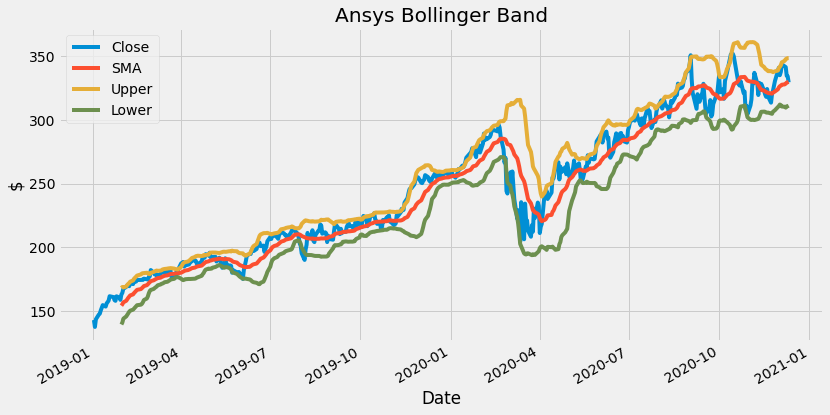

In [36]:
column_list = ['Close', 'SMA', 'Upper', 'Lower']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Ansys Bollinger Band')
plt.ylabel('$')
plt.show()

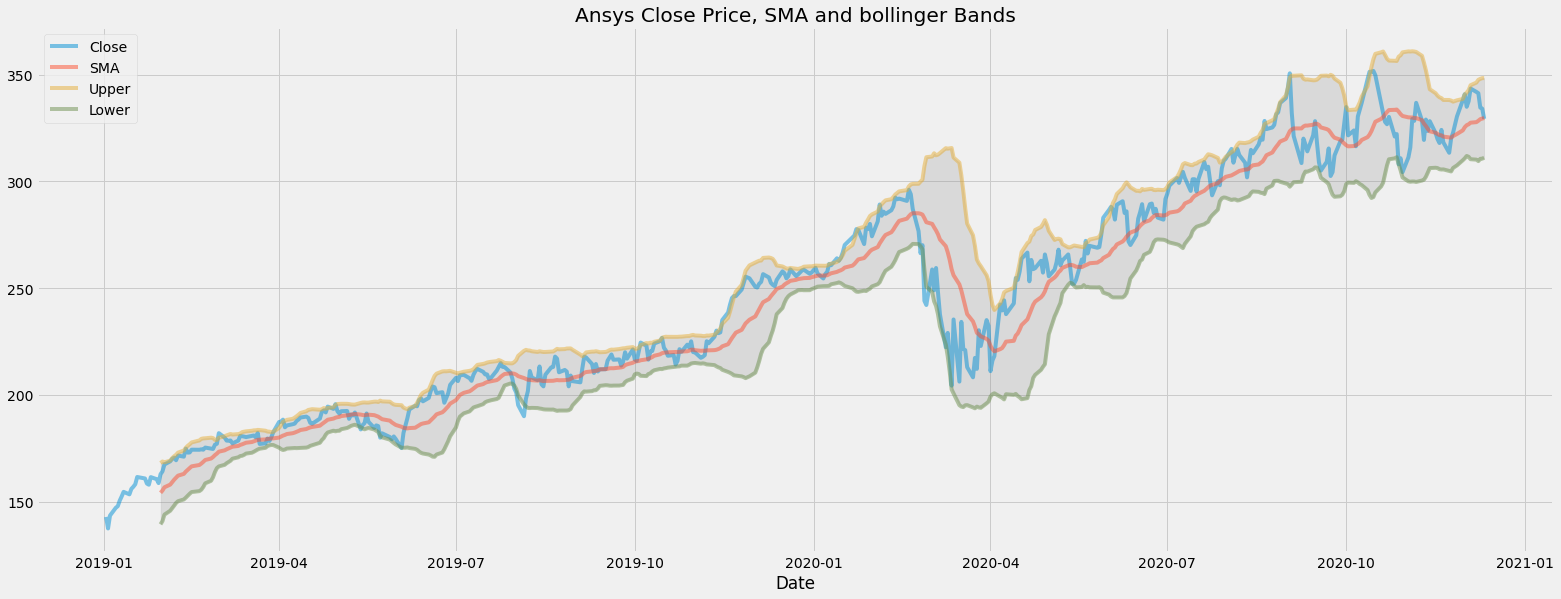

In [37]:
#shade the area
x_axis=df.index
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(df[column_list],  alpha = 0.5)
plt.title('Ansys Close Price, SMA and bollinger Bands')
plt.xlabel('Date')
plt.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey', alpha = 0.2)
plt.legend(column_list, loc='upper left')
# plt.xticks(rotation = 45)
plt.show()

In [38]:
def get_b_band_points(bband, period):
    bband_entry = []; bband_exit=[]

    for i in range(len(bband['Close'])):
        if bband['Close'][i] > bband['Upper'][i]: # close > upper band, sell
            bband_entry.append(np.nan)
            bband_exit.append(bband['Close'][i])
        elif bband['Close'][i] < bband['Lower'][i]: # close < lower band, buy
            bband_exit.append(np.nan)
            bband_entry.append(bband['Close'][i])
        else:
            bband_exit.append(np.nan)
            bband_entry.append(np.nan)
    return (bband_entry[period:], bband_exit[period:])


In [39]:
full_df['Bband_Buy'] = get_b_band_points(df, period)[0]
full_df['Bband_Sell'] = get_b_band_points(df, period)[1]

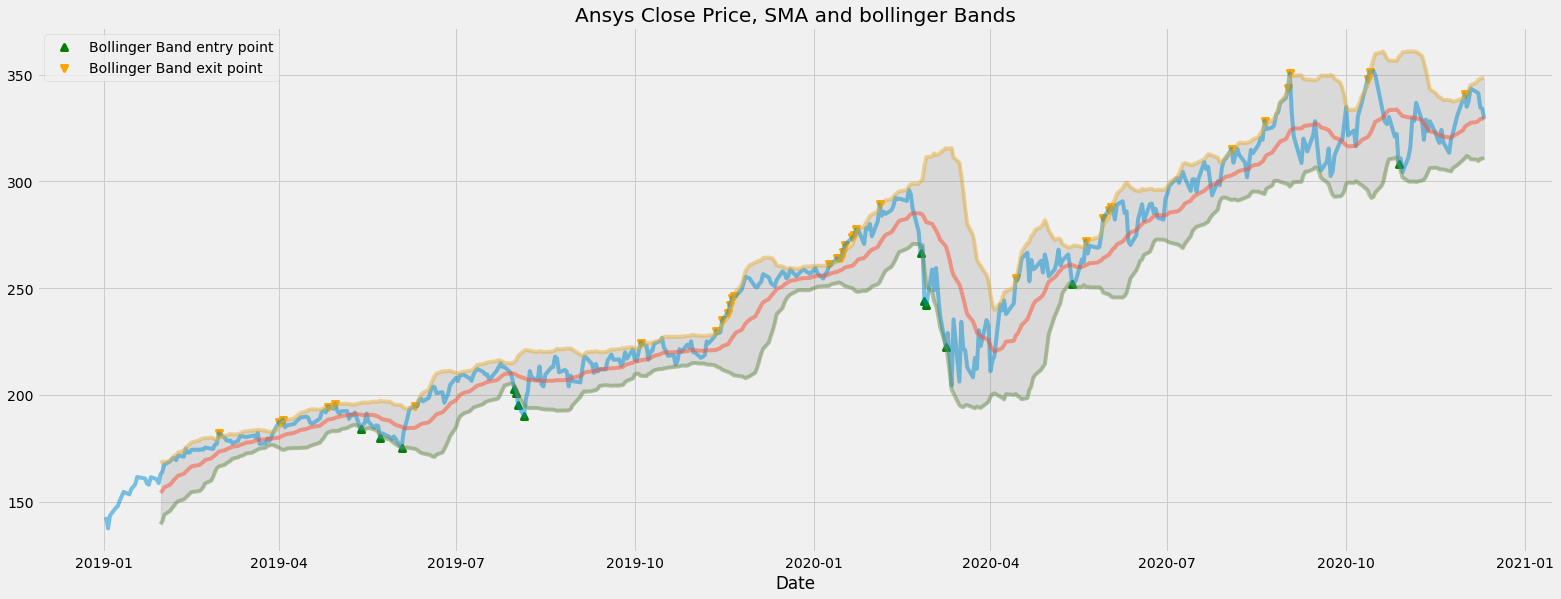

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(df[column_list],  alpha = 0.5)
plt.title('Ansys Close Price, SMA and bollinger Bands')
plt.xlabel('Date')
plt.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey', alpha = 0.2)
plt.scatter(full_df.index, full_df['Bband_Buy'], color = 'green', lw=3, label = 'Bollinger Band entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['Bband_Sell'], color = 'orange', lw=3, label = 'Bollinger Band exit point', marker = 'v', alpha = 1)
plt.legend(loc='upper left')
# plt.xticks(rotation = 45)
plt.show()

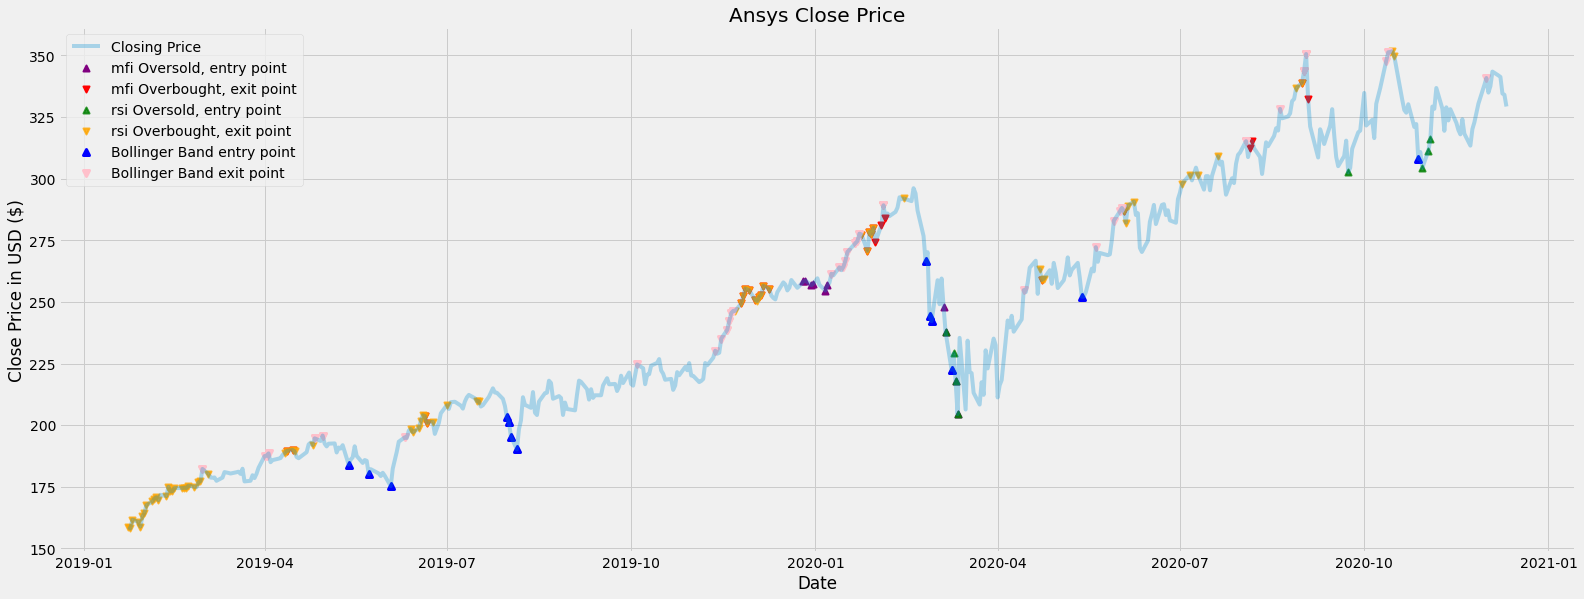

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.3)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', lw=2, label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', lw=2, label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', lw=2, label = 'rsi Oversold, entry point', marker = '^', alpha = 0.8)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', lw=2, label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.8)
plt.scatter(full_df.index, full_df['Bband_Buy'], color = 'blue', lw=3, label = 'Bollinger Band entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['Bband_Sell'], color = 'pink', lw=3, label = 'Bollinger Band exit point', marker = 'v', alpha = 1)
plt.title('Ansys Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()